## Сгенерируйте обучающую выборку из описанных двумя признаками объектов нескольких классов...

In [111]:
from sklearn import cross_validation, datasets, metrics, neighbors 
from sklearn.model_selection import KFold

from matplotlib.colors import ListedColormap

import numpy as np

In [112]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [113]:
def plot_2d_dataset(data, colors):
    pyplot.figure(figsize(16, 8))
    pyplot.scatter(map(lambda x: x[0], data[0]), map(lambda x: x[1], data[0]), c = data[1], cmap = colors)

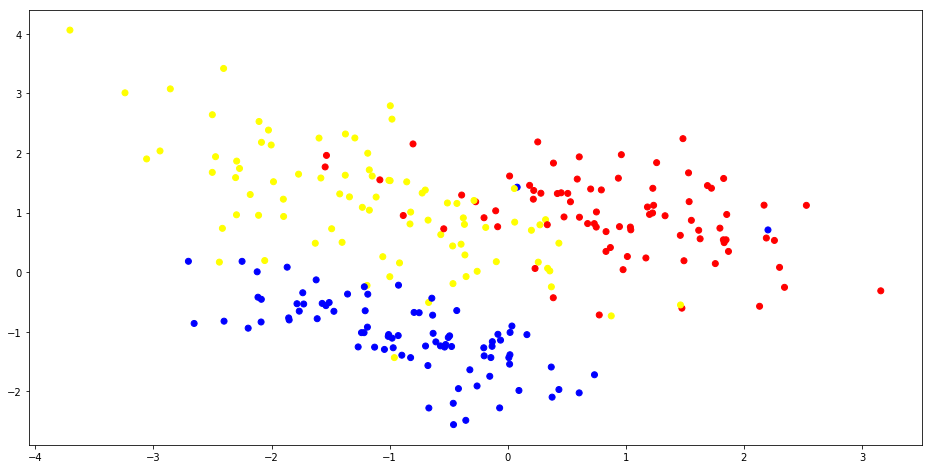

In [114]:
classification_problem = datasets.make_classification(n_samples = 250, n_features = 2, n_informative = 2, 
                                                            n_redundant = 0, n_classes = 3, n_clusters_per_class = 1,
                                                            random_state = 1 )
colors = ListedColormap(['red', 'yellow', 'blue'])
light_colors = ListedColormap(['lightcoral', 'lightyellow', 'lightblue'])

plot_2d_dataset(classification_problem, colors)
train_data = classification_problem[0]
train_labels = classification_problem[1]

## ...и визуализируйте разделяющие поверхности, получаемые при решении задачи классифкации методом k ближайших соседей для разных k.

In [115]:
def get_meshgrid(data, step=.01, border=.5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

In [116]:
def plot_decision_surface(estimator, train_data, train_labels, 
                          colors = colors, light_colors = light_colors):
    #fit model
    estimator.fit(train_data, train_labels)
    
    #set figure size
    pyplot.figure(figsize = (16, 8))
    
    #plot decision surface on the train data 
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, cmap = colors)
    pyplot.title('Train data, accuracy={:.2f}'.format(metrics.accuracy_score(train_labels, estimator.predict(train_data))))

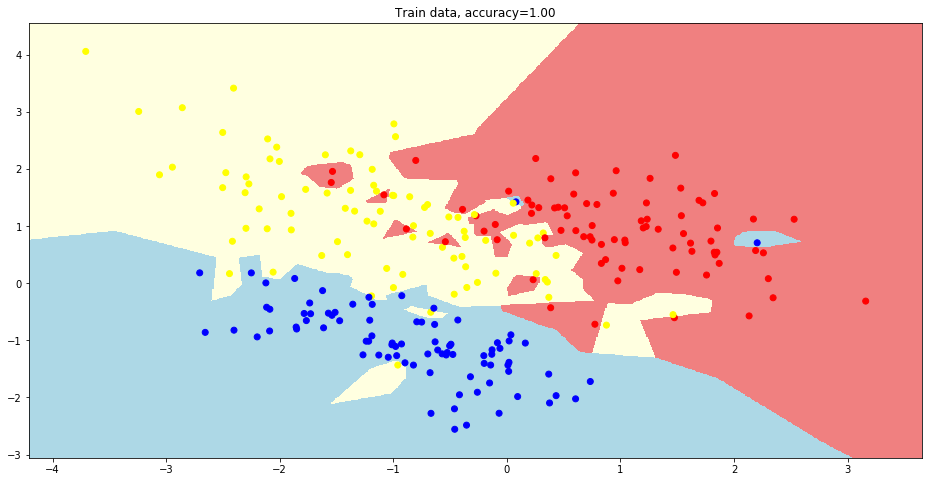

In [117]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=1)

plot_decision_surface(estimator, train_data, train_labels)

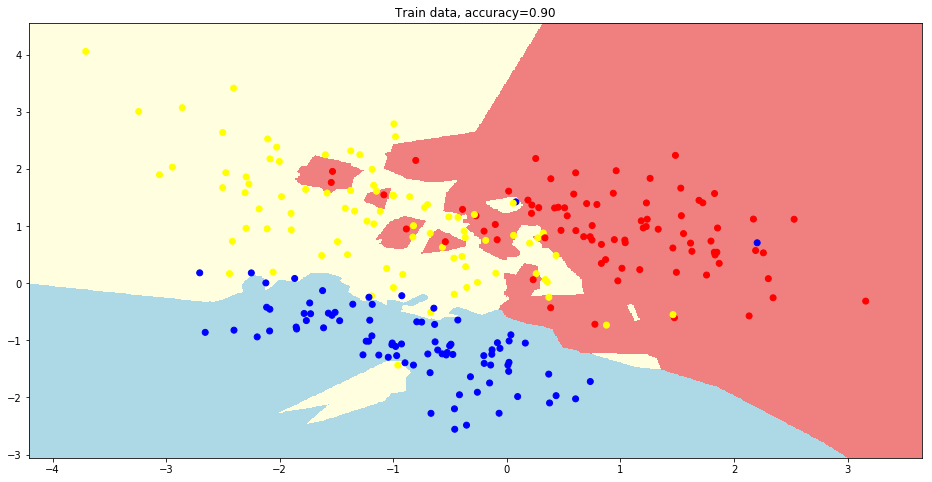

In [118]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=2)

plot_decision_surface(estimator, train_data, train_labels)

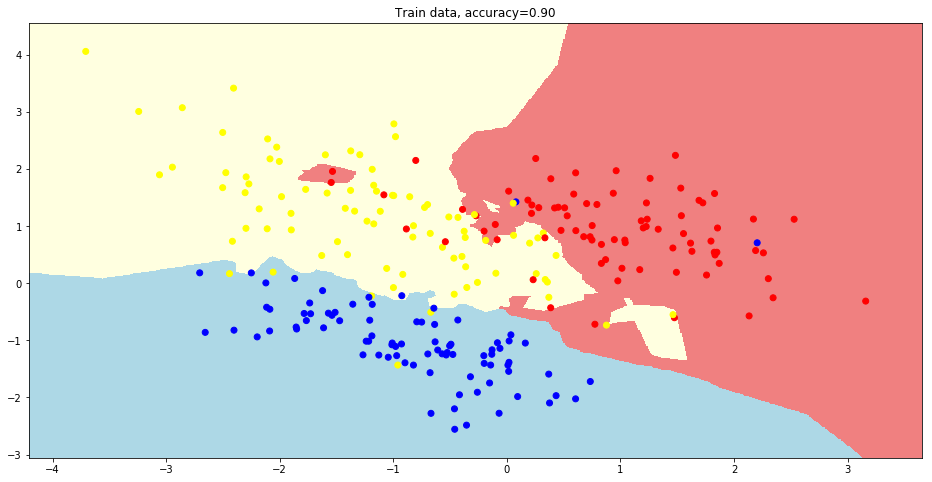

In [119]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=3)

plot_decision_surface(estimator, train_data, train_labels)

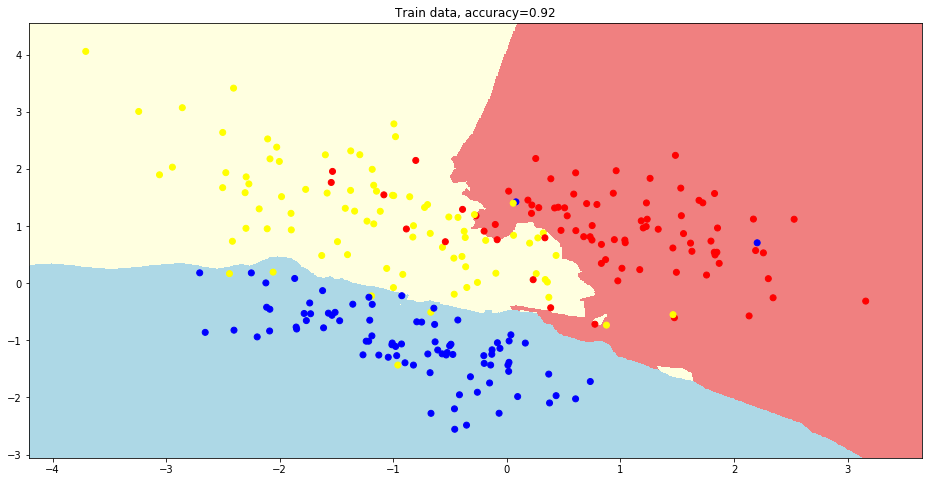

In [120]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=5)

plot_decision_surface(estimator, train_data, train_labels)

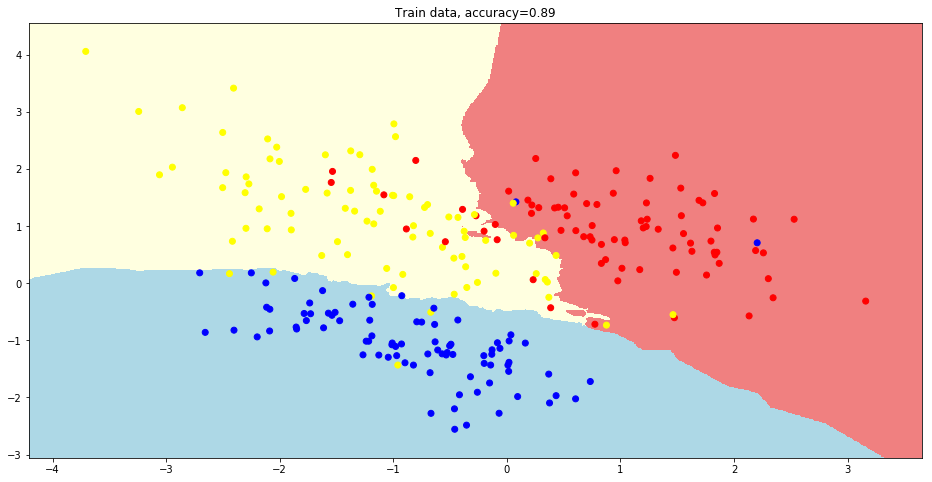

In [121]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=10)

plot_decision_surface(estimator, train_data, train_labels)

## Попробуйте подобрать оптимальное значение количества соседей k с помощью 5-fold cross-validation, построив график зависимости accuracy в кросс-валидации от k.

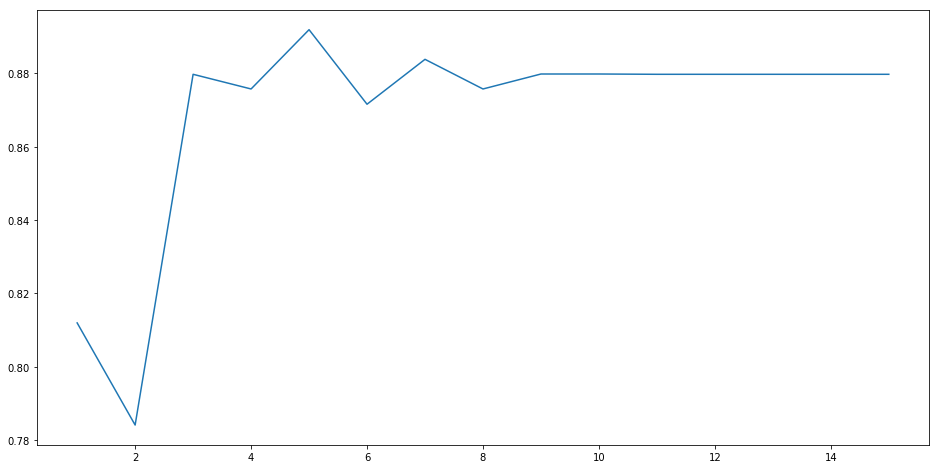

In [122]:
pyplot.figure(figsize = (16, 8))
data = [ 
    cross_val_score(neighbors.KNeighborsClassifier(n_neighbors = i), train_data, train_labels, cv = 5).mean()
    for i in range(1, 16, 1)
]
pyplot.plot(range(1, 16, 1), data)


### Значит, возьму k = 5.

## Загрузите датасеты digits и breast_cancer из sklearn.datasets. Выведите несколько строчек из обучающих выборок и посмотрите на признаки.

In [133]:
digits = datasets.load_digits()
breast_cancer = datasets.load_breast_cancer()
print(digits.data[1:3])
print(breast_cancer.data[1:3])

[[  0.   0.   0.  12.  13.   5.   0.   0.   0.   0.   0.  11.  16.   9.
    0.   0.   0.   0.   3.  15.  16.   6.   0.   0.   0.   7.  15.  16.
   16.   2.   0.   0.   0.   0.   1.  16.  16.   3.   0.   0.   0.   0.
    1.  16.  16.   6.   0.   0.   0.   0.   1.  16.  16.   6.   0.   0.
    0.   0.   0.  11.  16.  10.   0.   0.]
 [  0.   0.   0.   4.  15.  12.   0.   0.   0.   0.   3.  16.  15.  14.
    0.   0.   0.   0.   8.  13.   8.  16.   0.   0.   0.   0.   1.   6.
   15.  11.   0.   0.   0.   1.   8.  13.  15.   1.   0.   0.   0.   9.
   16.  16.   5.   0.   0.   0.   0.   3.  13.  16.  16.  11.   5.   0.
    0.   0.   0.   3.  11.  16.   9.   0.]]
[[  2.05700000e+01   1.77700000e+01   1.32900000e+02   1.32600000e+03
    8.47400000e-02   7.86400000e-02   8.69000000e-02   7.01700000e-02
    1.81200000e-01   5.66700000e-02   5.43500000e-01   7.33900000e-01
    3.39800000e+00   7.40800000e+01   5.22500000e-03   1.30800000e-02
    1.86000000e-02   1.34000000e-02   1.38900000e-02   3.

## С помощью sklearn.model_selection.cross_val_score c настройками по умолчанию и вызова метода mean() у возвращаемого этой функцией numpy.ndarray, сравните качество работы наивных байесовских классификаторов на этих двух датасетах. Для сравнения предлагается использовать BernoulliNB, MultinomialNB и GaussianNB.

In [138]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

In [154]:
def naive_bayes_testing(X_data, Y_data):
    estimators = [
        GaussianNB(),
        BernoulliNB(),
        MultinomialNB()
    ]
    for estimator in estimators:
        scoring = cross_val_score(estimator, X_data, Y_data)
        print('%.6lf' % scoring.mean())


In [155]:
print("digits data testing:")
naive_bayes_testing(digits.data, digits.target)
print("breast cancer data testing:")
naive_bayes_testing(breast_cancer.data, breast_cancer.target)

digits data testing:
0.818600
0.825824
0.870877
breast cancer data testing:
0.936749
0.627420
0.894579


## Насколько полученные результаты согласуются с вашими ожиданиями.

### Перед запуском я поставил на то, что в digit лидерами будут BernoulliNB() и MultinomialNB(), а в breast cancer GaussianNB(). Неожиданно плох оказался BernoulliNB() в breast_cancer.

## 1. Каким получилось максимальное качество классификации на датасете breast_cancer?

### 93.675%

## 2. Каким получилось максимальное качество классификации на датасете digits?

### 87%

## 3. Какие утверждения из приведенных ниже верны?
(a) На вещественных признаках лучше всего сработал наивный байесовский классификатор с распределением Бернулли

(b) На вещественных признаках лучше всего сработал наивный байесовский классификатор с мультиномиальным распределением

(c) Мультиномиальное распределение лучше показало себя на выборке с целыми неотрицательными значениями признаков

(d) На вещественных признаках лучше всего сработало нормальное распределение

### c и d

## Сгенерируйте датасет из 500 точек на плоскости, для которых y = 0.5x + 1 + E, где E распределено нормально с матожиданием 0 и дисперсией 0.2.

In [239]:
import random

In [240]:
pts = random.sample(xrange(1000), 575)
random.shuffle(pts)
data_x = pts[:500]
data_x.sort()
data_y = [i/2.0 + 1 + random.gauss(0, 0.2) for i in data_x]
newpts = pts[500:]
pts.sort()

## 1. Визуализируйте выборку.

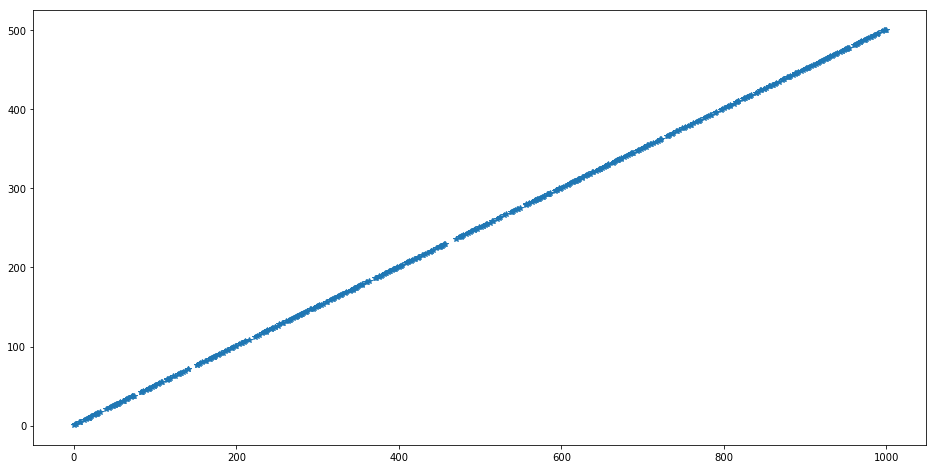

In [248]:
pyplot.plot(data_x, data_y, '*')

## 2. Восстановите по выборке зависимость y(x), считая, что зависимость имеет вид y = kx+b, и минимизируя MSE на обучающей выборке, воспользовавшись scipy.optimize.minimize. Визуализируйте восстановленную прямую.

In [249]:
from scipy.optimize import minimize

In [250]:
def mse(x_0):
    s = 0
    for i in range(500):
        s += (data_y[i] - x_0[0] * data_x[i] - x_0[1])**2
    return sqrt( 0.002 * s)

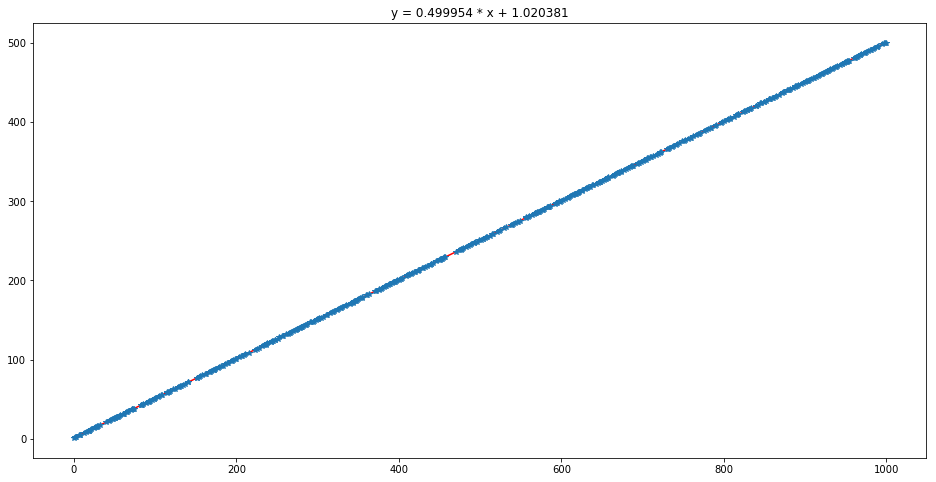

In [251]:
x_0 = [1, 1]
res = minimize(mse, x_0, tol=1e-6)
pyplot.title('y = {:.6f} * x + {:.6f}'.format(res.x[0], res.x[1]))
pyplot.plot(data_x, [res.x[0] * i + res.x[1] for i in data_x], 'r', data_x, data_y, '*')

## Добавьте теперь в выборку 75 точек, для которых y = -1 + E, а x принимает различные значения из того же диапазона, что и у уже имевшихся точек в обучающей выборке.

In [252]:
data_x = pts
data_y = [i/2.0 + 1 + random.gauss(0, 0.2) if i not in newpts else -1 + random.gauss(0, 0.2) for i in data_x]

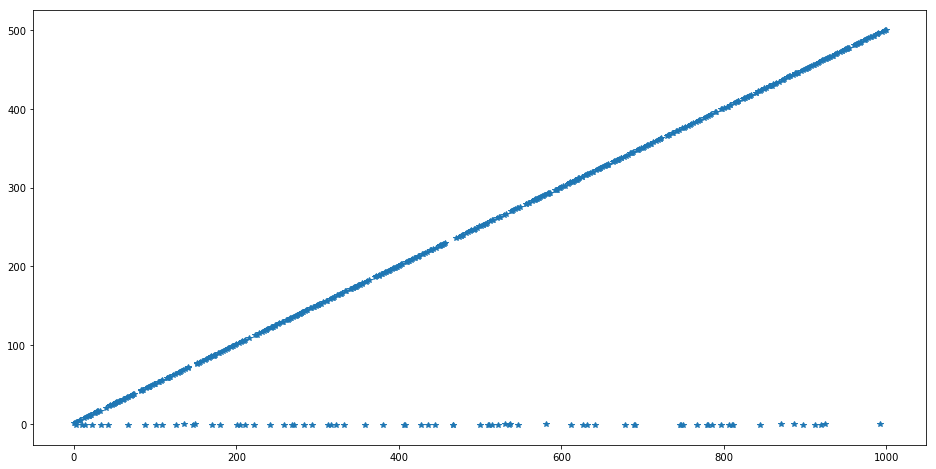

In [254]:
pyplot.plot(data_x, data_y, '*')

## По новой расширенной выборке снова попробуйте восстановить зависимость y(x) = kx + b двумя способами: минимизируя MSE и минимизируя MAE. Визуализируйте полученные прямые.

In [255]:
x_0 = [1, 1]
res = minimize(mse, x_0, tol=1e-6)
###pyplot.title('y = {:.6f} * x + {:.6f}'.format(res.x[0], res.x[1]))
###pyplot.plot(data_x, [res.x[0] * i + res.x[1] for i in data_x])

In [256]:
def mae(x_0):
    s = 0
    for i in range(500):
        s += abs(data_y[i] - x_0[0] * data_x[i] - x_0[1])
    return 0.002 * s

In [257]:
x_1 = [1, 1]
res2 = minimize(mae, x_1, tol = 1e-6)

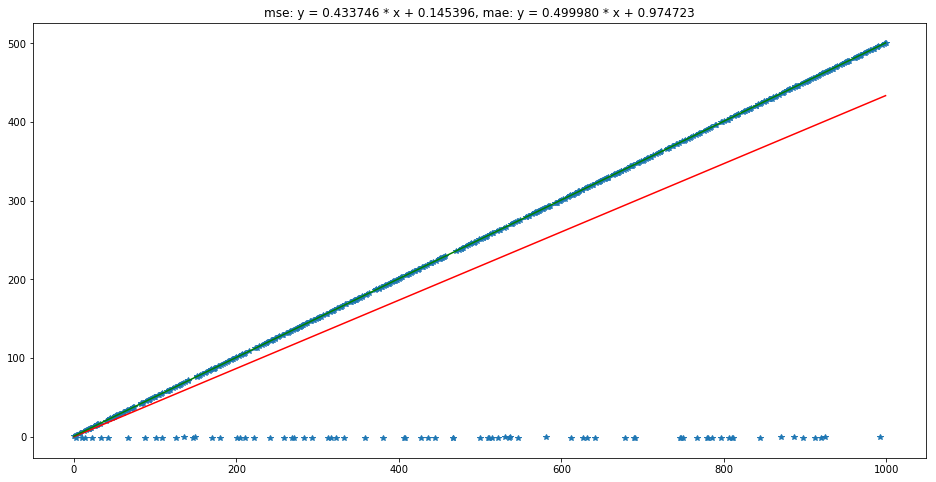

In [259]:
pyplot.title('mse: y = {:.6f} * x + {:.6f}, mae: y = {:.6f} * x + {:.6f}'.format(res.x[0], res.x[1], res2.x[0], res2.x[1]))
pyplot.plot(data_x, data_y, '*', data_x, [res.x[0] * i + res.x[1] for i in data_x], 'r', data_x, [res2.x[0] * i + res2.x[1] for i in data_x], 'g')

## . На основе полученных графиков сделайте вывод об устойчивости моделей, оптимизирующих MSE и MAE к выбросам.

### MAE гораздо устойчивее к выбросам, относительно MSE.